In [1]:
import pytesseract
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import os

In [2]:
images_path_array = []
products_name = ['biscuits', 'broccoli', 'cheese', 'coffee', 'curd', 'dough', 'milk', 'pancakes', 'sourcream', 'tea']
for dirpath,_,filenames in os.walk('traindataset'):
    for f in filenames:
        images_path_array.append(os.path.abspath(os.path.join(dirpath, f)))

In [3]:
print(len(images_path_array))

40129


In [9]:
test_img_path = images_path_array[np.random.randint(len(images_path_array))]
test_img = Image.open(test_img_path)
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\PC\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

In [10]:
date_pattern = '\d+\.\d+\.\d+/\d+:\d+'
price_pattern = '\d+р\d+к'
name_pattern = '.*?(?=, )'

In [11]:
data = ' '.join(pytesseract.image_to_string(test_img, lang='rus').split())

date = re.search(date_pattern, data)[0]
price = list(map(int, re.split('[рк]', re.search(price_pattern, data)[0])[0:2]))

data='Сметана из топленых сливок 15% 300г 79р90к Цена за шт. 20.12.2022/10:21' 
 date='20.12.2022/10:21' 
 price=[79, 90]


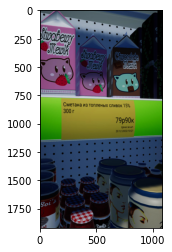

In [12]:
print(f'{data=} \n {date=} \n {price=}')
plt.imshow(test_img)

## Создание словаря синонимов

In [13]:
biscuits_synonym = 'баба, пирожное, фарфор, выпечные изделия, хворост, выпечка, вафля, пончик, бисквит, галета, заедки, баракиль, ваглодка, кантуччи, фльоранси, бискотти, пампушка, птифур, печеньице, крекер, шакер-чурек, канелон, аллюмет, чокопай, печенька, шимандорики, розанец, печенюшка, печево, курабье, тесто, печение, хлебец, лепёшка, пышка, оладья, хлеб, печенье'.split(', ')
broccoli_synonym = 'капуста, брокколь, брокколи'.split(', ')
cheese_synonym = 'российский, продукт, голландский, корт, кусок пластмассы, чанах, фета, сырок, бри, Эдем, брынза, рокфор, пармезан, мусорелла, сырочек, бяло, молокопродукт, каймак, ливаро, жекс, беллелэ, анжело, грюйер, Честер, гауда, хурут, пыштак, курут, эпуас, эторки, шом, шавру, фурм-дэ-амбер, фоль-эпи, эдамер, трюфье, траунгольд, тильзберг, сириус-камамбер, сент-северин, сент-море, сент-альбре, сент-агюр, салерс, роло, паелла, реблошон, рамболь, рам-бри, остеркрон, моосбахер, горгонзола, мондзеер, мильдзитер, масдам, вье-пане, бри-рошбрюн, моцарелла, бресс-блю, бребиу, бональпи, бле-де-овернь, аперифре-провансаль, амадеус, чеддер, альпцирлер, альпидамер, мюнстер, камамбер, бакштейн, канталь, эмменталь, сулугуни, рикотта, эдамский, качкавал, корот, асьяго, марцолино, сыр'.split(', ')
coffee_synonym = 'кофеек, эспрессо, капуцин, напиток бодрости, ароматные зерна, душистые зерна, латте, кофеишко, кофеечек, нескафе, капучино, мокко, демитасс, кофейло-помойло, кава, моккачино, питье, кофий, кофей, кофе'.split(', ')
curd_synonym = 'продукт, творожок, биотворог, молокопродукт, бутеня, биолакт, тофу, сузме, эремчек, доуфу, творог'.split(', ')
dough_synonym = 'масса, квашня, опара, соченье, соченек, адъяция, канди, золуста, залуста, кляр, пек, кусок, крица, папье-маше, тесто'.split(', ')
milk_synonym = 'молочко, сгущенка, варенец, молочишко, ирьян, молокопродукт, айран, спецмолоко, чал, ацидофилин, катык, млеко, молозиво, молоко'.split(', ')
pancakes_synonym = 'блин, блинтц, блинец, блиночек, блинок, лепешка, блины'.split(', ')
sourcream_synonym = 'сметанка, сметана'.split(', ')
tea_synonym = 'чаек, чай, чифирь, шалфей, чаечек, фиточай, копорка, шаван, пекко, камфу, гизон, юньнань, Пуэр, Дарджилинг, чаеванье, травяной чай'.split(', ')
